<a href="https://colab.research.google.com/github/Alf-caput/NFL2022_TacklePredictNN/blob/dev2/anruki_columns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import gdown
import os
id = '1V_fIjH-WGHTVgyRkdNFkZ6XxiqDoaMrA'
folder = 'nfl-big-data-bowl-2024'
endpoint = '.zip'

url = f'https://drive.google.com/uc?id={id}'

output = folder + endpoint

if not os.path.exists(output):
    gdown.download(url, output, quiet=False)

In [47]:
from zipfile import ZipFile

if not os.path.exists(folder):
	with ZipFile(output, 'r') as zObject:
		zObject.extractall(folder)

In [48]:
import pandas as pd
import os

csv_files = [file for file in os.listdir(folder) if file.endswith('.csv')]
csv_files.sort()

In [49]:
print(csv_files)

['games.csv', 'players.csv', 'plays.csv', 'tackles.csv', 'tracking_week_1.csv', 'tracking_week_2.csv', 'tracking_week_3.csv', 'tracking_week_4.csv', 'tracking_week_5.csv', 'tracking_week_6.csv', 'tracking_week_7.csv', 'tracking_week_8.csv', 'tracking_week_9.csv']


Dentro de la carpeta nfl-big-data-bowl-2024 se encuentran los csv que utilizaremos, a continuación creamos un diccionario para facilitarnos el acceso a los diferentes dataframes (dfs).

In [50]:
if 'dfs' not in locals():
    dfs = {os.path.splitext(file)[0]: pd.read_csv(os.path.join(folder, file)) for file in csv_files}

In [51]:
dfs.keys()

dict_keys(['games', 'players', 'plays', 'tackles', 'tracking_week_1', 'tracking_week_2', 'tracking_week_3', 'tracking_week_4', 'tracking_week_5', 'tracking_week_6', 'tracking_week_7', 'tracking_week_8', 'tracking_week_9'])

In [52]:
df_week1 = dfs['tracking_week_1']

game_ids = df_week1['gameId'].unique()
df_week1_game1 = df_week1[df_week1['gameId']==game_ids[0]]

play_ids = df_week1_game1['playId'].unique()
df_week1_game1_play1 = df_week1_game1[df_week1_game1['playId']==play_ids[0]]

frame_ids = df_week1_game1_play1['frameId'].unique()
df_week1_game1_play1_frame1 = df_week1_game1_play1[df_week1_game1_play1['frameId']==frame_ids[0]]

df_week1_game1_play1_frame1.head(3)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN
22,2022090800,56,38577.0,Bobby Wagner,1,2022-09-08 20:24:05.200000,45.0,LA,left,78.25,27.53,1.24,3.81,0.11,4.20,331.67,NaN
44,2022090800,56,41239.0,Aaron Donald,1,2022-09-08 20:24:05.200000,99.0,LA,left,91.08,31.61,3.91,2.34,0.40,168.33,132.02,NaN


In [53]:
df_week1_game1_play1_frame1.drop(columns=['displayName', 'jerseyNumber'], inplace=True)
df_week1_game1_play1_frame1.head(3)

<ipython-input-53-3cf01494b1d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week1_game1_play1_frame1.drop(columns=['displayName', 'jerseyNumber'], inplace=True)


,gameId,playId,nflId,frameId,time,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,1,2022-09-08 20:24:05.200000,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN
22,2022090800,56,38577.0,1,2022-09-08 20:24:05.200000,LA,left,78.25,27.53,1.24,3.81,0.11,4.20,331.67,NaN
44,2022090800,56,41239.0,1,2022-09-08 20:24:05.200000,LA,left,91.08,31.61,3.91,2.34,0.40,168.33,132.02,NaN


In [54]:
df_week1_game1_play1_frame1 = pd.merge(df_week1_game1_play1_frame1, dfs['players'][['position', 'nflId']], on='nflId', how='left')
df_week1_game1_play1_frame1.head(3)

,gameId,playId,nflId,frameId,time,club,playDirection,x,y,s,a,dis,o,dir,event,position
0,2022090800,56,35472.0,1,2022-09-08 20:24:05.200000,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,G
1,2022090800,56,38577.0,1,2022-09-08 20:24:05.200000,LA,left,78.25,27.53,1.24,3.81,0.11,4.20,331.67,NaN,ILB
2,2022090800,56,41239.0,1,2022-09-08 20:24:05.200000,LA,left,91.08,31.61,3.91,2.34,0.40,168.33,132.02,NaN,DT


In [55]:
df_week1_game1_play1_frame1 = pd.merge(df_week1_game1_play1_frame1, dfs['games'][['homeTeamAbbr', 'gameId']], on='gameId', how='left')
df_week1_game1_play1_frame1.head(3)

,gameId,playId,nflId,frameId,time,club,playDirection,x,y,s,a,dis,o,dir,event,position,homeTeamAbbr
0,2022090800,56,35472.0,1,2022-09-08 20:24:05.200000,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,G,LA
1,2022090800,56,38577.0,1,2022-09-08 20:24:05.200000,LA,left,78.25,27.53,1.24,3.81,0.11,4.20,331.67,NaN,ILB,LA
2,2022090800,56,41239.0,1,2022-09-08 20:24:05.200000,LA,left,91.08,31.61,3.91,2.34,0.40,168.33,132.02,NaN,DT,LA


Como ahora sabemos el equipo local en la columna club cambiamos las abreviaturas a valor 0 (visitante) ó 1 (local) ó -1 (football)

In [56]:
df_week1_game1_play1_frame1['homeTeamAbbr'].unique()[0]

'LA'

In [57]:
local = df_week1_game1_play1_frame1['homeTeamAbbr'].unique()[0]
df_week1_game1_play1_frame1.loc[df_week1_game1_play1_frame1['club'] == 'football', 'club'] = -1
df_week1_game1_play1_frame1.loc[df_week1_game1_play1_frame1['club'] == local, 'club'] = 1
df_week1_game1_play1_frame1.loc[(df_week1_game1_play1_frame1['club'] != -1) & (df_week1_game1_play1_frame1['club'] != 1), 'club'] = 0
df_week1_game1_play1_frame1.head(3)

,gameId,playId,nflId,frameId,time,club,playDirection,x,y,s,a,dis,o,dir,event,position,homeTeamAbbr
0,2022090800,56,35472.0,1,2022-09-08 20:24:05.200000,0,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,G,LA
1,2022090800,56,38577.0,1,2022-09-08 20:24:05.200000,1,left,78.25,27.53,1.24,3.81,0.11,4.20,331.67,NaN,ILB,LA
2,2022090800,56,41239.0,1,2022-09-08 20:24:05.200000,1,left,91.08,31.61,3.91,2.34,0.40,168.33,132.02,NaN,DT,LA


Si ataca el equipo local playDirection = 1, en caso contrario (ataca equipo visitante) playDirection = 0

In [58]:
df_week1_game1_play1_frame1.loc[:, 'playDirection'] = int(df_week1_game1_play1_frame1['playDirection'].unique()[0] == 'right')
df_week1_game1_play1_frame1.head(3)

<ipython-input-58-4fc13e745533>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_week1_game1_play1_frame1.loc[:, 'playDirection'] = int(df_week1_game1_play1_frame1['playDirection'].unique()[0] == 'right')


,gameId,playId,nflId,frameId,time,club,playDirection,x,y,s,a,dis,o,dir,event,position,homeTeamAbbr
0,2022090800,56,35472.0,1,2022-09-08 20:24:05.200000,0,0,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,G,LA
1,2022090800,56,38577.0,1,2022-09-08 20:24:05.200000,1,0,78.25,27.53,1.24,3.81,0.11,4.20,331.67,NaN,ILB,LA
2,2022090800,56,41239.0,1,2022-09-08 20:24:05.200000,1,0,91.08,31.61,3.91,2.34,0.40,168.33,132.02,NaN,DT,LA


Sustituimos el tiempo por el cuarto de juego en el que se encuentran y añadimos columnas con el intento (down) y el número de yardas restantes (yardsToGo)

In [59]:
df_week1_game1_play1_frame1 = pd.merge(df_week1_game1_play1_frame1, dfs['plays'][['down', 'quarter', 'yardsToGo', 'gameId', 'playId']], on=['gameId', 'playId'], how='left')
df_week1_game1_play1_frame1.drop(columns='time')
df_week1_game1_play1_frame1.head(3)

,gameId,playId,nflId,frameId,time,club,playDirection,x,y,s,a,dis,o,dir,event,position,homeTeamAbbr,down,quarter,yardsToGo
0,2022090800,56,35472.0,1,2022-09-08 20:24:05.200000,0,0,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,G,LA,1,1,10
1,2022090800,56,38577.0,1,2022-09-08 20:24:05.200000,1,0,78.25,27.53,1.24,3.81,0.11,4.20,331.67,NaN,ILB,LA,1,1,10
2,2022090800,56,41239.0,1,2022-09-08 20:24:05.200000,1,0,91.08,31.61,3.91,2.34,0.40,168.33,132.02,NaN,DT,LA,1,1,10


Ordenamos los jugadores por equipo

In [60]:
df_week1_game1_play1_frame1 = df_week1_game1_play1_frame1.sort_values(by='club', ascending=True)
df_week1_game1_play1_frame1.head(3)

,gameId,playId,nflId,frameId,time,club,playDirection,x,y,s,a,dis,o,dir,event,position,homeTeamAbbr,down,quarter,yardsToGo
22,2022090800,56,NaN,1,2022-09-08 20:24:05.200000,-1,0,85.050003,33.810001,22.209999,11.85,2.07,NaN,NaN,NaN,NaN,LA,1,1,10
20,2022090800,56,53522.0,1,2022-09-08 20:24:05.200000,0,0,91.960000,33.010000,2.400000,2.57,0.24,23.25,117.85,NaN,T,LA,1,1,10
18,2022090800,56,52536.0,1,2022-09-08 20:24:05.200000,0,0,74.350000,7.140000,7.910000,0.79,0.79,269.06,260.37,NaN,WR,LA,1,1,10


Eliminamos la columna de equipo local, obteniendo los datos finales para un frame que utilizaremos

In [61]:
df_week1_game1_play1_frame1 = df_week1_game1_play1_frame1.drop(columns='homeTeamAbbr')
df_week1_game1_play1_frame1

,gameId,playId,nflId,frameId,time,club,playDirection,x,y,s,a,dis,o,dir,event,position,down,quarter,yardsToGo
22,2022090800,56,NaN,1,2022-09-08 20:24:05.200000,-1,0,85.050003,33.810001,22.209999,11.85,2.07,NaN,NaN,NaN,NaN,1,1,10
20,2022090800,56,53522.0,1,2022-09-08 20:24:05.200000,0,0,91.960000,33.010000,2.400000,2.57,0.24,23.25,117.85,NaN,T,1,1,10
18,2022090800,56,52536.0,1,2022-09-08 20:24:05.200000,0,0,74.350000,7.140000,7.910000,0.79,0.79,269.06,260.37,NaN,WR,1,1,10
17,2022090800,56,48512.0,1,2022-09-08 20:24:05.200000,0,0,90.220000,32.080000,2.770000,2.46,0.28,103.24,115.97,NaN,C,1,1,10
14,2022090800,56,47879.0,1,2022-09-08 20:24:05.200000,0,0,76.540000,32.030000,6.100000,4.49,0.61,155.02,220.71,NaN,TE,1,1,10
13,2022090800,56,47857.0,1,2022-09-08 20:24:05.200000,0,0,88.170000,24.170000,1.940000,0.33,0.19,325.95,238.13,NaN,RB,1,1,10
10,2022090800,56,44985.0,1,2022-09-08 20:24:05.200000,0,0,76.700000,18.390000,4.790000,6.34,0.49,157.83,233.63,NaN,WR,1,1,10
9,2022090800,56,44875.0,1,2022-09-08 20:24:05.200000,0,0,89.420000,25.810000,1.890000,2.47,0.18,242.67,65.25,NaN,T,1,1,10
0,2022090800,56,35472.0,1,2022-09-08 20:24:05.200000,0,0,88.370000,27.270000,1.620000,1.15,0.16,231.74,147.90,NaN,G,1,1,10
4,2022090800,56,42489.0,1,2022-09-08 20:24:05.200000,0,0,80.600000,38.290000,6.230000,0.90,0.62,140.05,189.38,NaN,WR,1,1,10


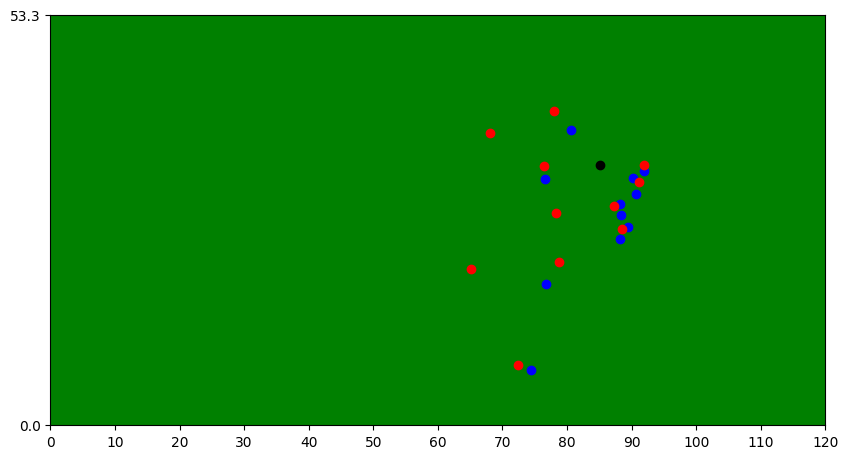

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5.33))

for i, row in df_week1_game1_play1_frame1.iterrows():
    if row['club'] == 0:
        color = 'blue'
    elif row['club'] == 1:
        color = 'red'
    else:
        color = 'black'
    ax.scatter(row['x'], row['y'], marker='o', color=color)
plt.xticks(range(0, 130, 10))
plt.yticks([0, 53.3])
ax.set_facecolor('green')

plt.show()


In [63]:
ds = dfs['tracking_week_1']
ds.drop(columns=['displayName', 'jerseyNumber', 'event', 'time'], inplace=True)
ds

,gameId,playId,nflId,frameId,club,playDirection,x,y,s,a,dis,o,dir
0,2022090800,56,35472.0,1,BUF,left,88.370000,27.27,1.62,1.15,0.16,231.74,147.90
1,2022090800,56,35472.0,2,BUF,left,88.470000,27.13,1.67,0.61,0.17,230.98,148.53
2,2022090800,56,35472.0,3,BUF,left,88.560000,27.01,1.57,0.49,0.15,230.98,147.05
3,2022090800,56,35472.0,4,BUF,left,88.640000,26.90,1.44,0.89,0.14,232.38,145.42
4,2022090800,56,35472.0,5,BUF,left,88.720000,26.80,1.29,1.24,0.13,233.36,141.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407434,2022091200,3826,NaN,49,football,left,56.220001,9.89,2.56,1.25,0.25,NaN,NaN
1407435,2022091200,3826,NaN,50,football,left,56.060001,10.08,2.50,1.14,0.24,NaN,NaN
1407436,2022091200,3826,NaN,51,football,left,55.889999,10.27,2.38,1.70,0.25,NaN,NaN
1407437,2022091200,3826,NaN,52,football,left,55.730000,10.44,2.07,2.83,0.24,NaN,NaN


In [64]:
ds.sort_values(by=['gameId', 'playId', 'frameId', 'club'], ascending=True, inplace=True)
ds.reset_index(drop=True, inplace=True)
ds

,gameId,playId,nflId,frameId,club,playDirection,x,y,s,a,dis,o,dir
0,2022090800,56,35472.0,1,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90
1,2022090800,56,42392.0,1,BUF,left,88.25,28.74,0.67,1.97,0.07,244.21,30.29
2,2022090800,56,42489.0,1,BUF,left,80.60,38.29,6.23,0.90,0.62,140.05,189.38
3,2022090800,56,44875.0,1,BUF,left,89.42,25.81,1.89,2.47,0.18,242.67,65.25
4,2022090800,56,44985.0,1,BUF,left,76.70,18.39,4.79,6.34,0.49,157.83,233.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407434,2022091200,3826,52435.0,53,SEA,left,56.58,10.06,0.44,3.86,0.07,325.84,318.56
1407435,2022091200,3826,52456.0,53,SEA,left,54.34,10.10,1.51,1.90,0.16,99.54,217.56
1407436,2022091200,3826,54505.0,53,SEA,left,56.65,7.97,0.18,2.09,0.01,34.58,225.96
1407437,2022091200,3826,54618.0,53,SEA,left,51.31,7.39,1.80,1.37,0.18,30.36,39.03


In [66]:
ds['playDirection'] = ds['playDirection'].replace({'left': 0, 'right': 1})
ds

,gameId,playId,nflId,frameId,club,playDirection,x,y,s,a,dis,o,dir
0,2022090800,56,35472.0,1,BUF,0,88.37,27.27,1.62,1.15,0.16,231.74,147.90
1,2022090800,56,42392.0,1,BUF,0,88.25,28.74,0.67,1.97,0.07,244.21,30.29
2,2022090800,56,42489.0,1,BUF,0,80.60,38.29,6.23,0.90,0.62,140.05,189.38
3,2022090800,56,44875.0,1,BUF,0,89.42,25.81,1.89,2.47,0.18,242.67,65.25
4,2022090800,56,44985.0,1,BUF,0,76.70,18.39,4.79,6.34,0.49,157.83,233.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407434,2022091200,3826,52435.0,53,SEA,0,56.58,10.06,0.44,3.86,0.07,325.84,318.56
1407435,2022091200,3826,52456.0,53,SEA,0,54.34,10.10,1.51,1.90,0.16,99.54,217.56
1407436,2022091200,3826,54505.0,53,SEA,0,56.65,7.97,0.18,2.09,0.01,34.58,225.96
1407437,2022091200,3826,54618.0,53,SEA,0,51.31,7.39,1.80,1.37,0.18,30.36,39.03


In [67]:
ds = pd.merge(ds, dfs['games'][['homeTeamAbbr', 'gameId']], on='gameId', how='left')
ds

,gameId,playId,nflId,frameId,club,playDirection,x,y,s,a,dis,o,dir,homeTeamAbbr
0,2022090800,56,35472.0,1,BUF,0,88.37,27.27,1.62,1.15,0.16,231.74,147.90,LA
1,2022090800,56,42392.0,1,BUF,0,88.25,28.74,0.67,1.97,0.07,244.21,30.29,LA
2,2022090800,56,42489.0,1,BUF,0,80.60,38.29,6.23,0.90,0.62,140.05,189.38,LA
3,2022090800,56,44875.0,1,BUF,0,89.42,25.81,1.89,2.47,0.18,242.67,65.25,LA
4,2022090800,56,44985.0,1,BUF,0,76.70,18.39,4.79,6.34,0.49,157.83,233.63,LA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407434,2022091200,3826,52435.0,53,SEA,0,56.58,10.06,0.44,3.86,0.07,325.84,318.56,SEA
1407435,2022091200,3826,52456.0,53,SEA,0,54.34,10.10,1.51,1.90,0.16,99.54,217.56,SEA
1407436,2022091200,3826,54505.0,53,SEA,0,56.65,7.97,0.18,2.09,0.01,34.58,225.96,SEA
1407437,2022091200,3826,54618.0,53,SEA,0,51.31,7.39,1.80,1.37,0.18,30.36,39.03,SEA


In [68]:
ds['local'] = -1
ds.loc[ds['club'] == ds['homeTeamAbbr'], 'local'] = 1
ds.loc[ds['club'] == 'football', 'local'] = 0
ds.drop(columns=['club', 'homeTeamAbbr'], inplace=True)
ds

,gameId,playId,nflId,frameId,playDirection,x,y,s,a,dis,o,dir,local
0,2022090800,56,35472.0,1,0,88.37,27.27,1.62,1.15,0.16,231.74,147.90,-1
1,2022090800,56,42392.0,1,0,88.25,28.74,0.67,1.97,0.07,244.21,30.29,-1
2,2022090800,56,42489.0,1,0,80.60,38.29,6.23,0.90,0.62,140.05,189.38,-1
3,2022090800,56,44875.0,1,0,89.42,25.81,1.89,2.47,0.18,242.67,65.25,-1
4,2022090800,56,44985.0,1,0,76.70,18.39,4.79,6.34,0.49,157.83,233.63,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407434,2022091200,3826,52435.0,53,0,56.58,10.06,0.44,3.86,0.07,325.84,318.56,1
1407435,2022091200,3826,52456.0,53,0,54.34,10.10,1.51,1.90,0.16,99.54,217.56,1
1407436,2022091200,3826,54505.0,53,0,56.65,7.97,0.18,2.09,0.01,34.58,225.96,1
1407437,2022091200,3826,54618.0,53,0,51.31,7.39,1.80,1.37,0.18,30.36,39.03,1


In [69]:
ds = pd.merge(ds, dfs['plays'][['ballCarrierId', 'playId', 'gameId']], on=['playId', 'gameId'], how='left')
ds['ballCarrier'] = 0
ds.loc[ds['nflId'] == ds['ballCarrierId'], 'ballCarrier'] = 1
ds.drop(columns='ballCarrierId')
ds

,gameId,playId,nflId,frameId,playDirection,x,y,s,a,dis,o,dir,local,ballCarrierId,ballCarrier
0,2022090800,56,35472.0,1,0,88.37,27.27,1.62,1.15,0.16,231.74,147.90,-1,42489,0
1,2022090800,56,42392.0,1,0,88.25,28.74,0.67,1.97,0.07,244.21,30.29,-1,42489,0
2,2022090800,56,42489.0,1,0,80.60,38.29,6.23,0.90,0.62,140.05,189.38,-1,42489,1
3,2022090800,56,44875.0,1,0,89.42,25.81,1.89,2.47,0.18,242.67,65.25,-1,42489,0
4,2022090800,56,44985.0,1,0,76.70,18.39,4.79,6.34,0.49,157.83,233.63,-1,42489,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407434,2022091200,3826,52435.0,53,0,56.58,10.06,0.44,3.86,0.07,325.84,318.56,1,53464,0
1407435,2022091200,3826,52456.0,53,0,54.34,10.10,1.51,1.90,0.16,99.54,217.56,1,53464,0
1407436,2022091200,3826,54505.0,53,0,56.65,7.97,0.18,2.09,0.01,34.58,225.96,1,53464,0
1407437,2022091200,3826,54618.0,53,0,51.31,7.39,1.80,1.37,0.18,30.36,39.03,1,53464,0


In [74]:
ds = ds.drop(columns=['gameId','playId','frameId','o','dir','nflId','ballCarrierId'])

KeyError: "['gameId', 'playId', 'frameId', 'o', 'dir', 'nflId', 'ballCarrierId'] not found in axis"

In [77]:
ds

,playDirection,x,y,s,a,dis,local,ballCarrier
0,0,88.37,27.27,1.62,1.15,0.16,-1,0
1,0,88.25,28.74,0.67,1.97,0.07,-1,0
2,0,80.60,38.29,6.23,0.90,0.62,-1,1
3,0,89.42,25.81,1.89,2.47,0.18,-1,0
4,0,76.70,18.39,4.79,6.34,0.49,-1,0
...,...,...,...,...,...,...,...,...
1407434,0,56.58,10.06,0.44,3.86,0.07,1,0
1407435,0,54.34,10.10,1.51,1.90,0.16,1,0
1407436,0,56.65,7.97,0.18,2.09,0.01,1,0
1407437,0,51.31,7.39,1.80,1.37,0.18,1,0


In [75]:
input = ds.values
input.shape

(1407439, 8)

In [76]:
input

array([[ 0.00000000e+00,  8.83700000e+01,  2.72700000e+01, ...,
         1.60000000e-01, -1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  8.82500000e+01,  2.87400000e+01, ...,
         7.00000000e-02, -1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  8.06000000e+01,  3.82900000e+01, ...,
         6.20000000e-01, -1.00000000e+00,  1.00000000e+00],
       ...,
       [ 0.00000000e+00,  5.66500000e+01,  7.97000000e+00, ...,
         1.00000000e-02,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  5.13100000e+01,  7.39000000e+00, ...,
         1.80000000e-01,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  5.55699997e+01,  1.05699997e+01, ...,
         2.00000003e-01,  0.00000000e+00,  0.00000000e+00]])

El número de filas entre 23 nos dá el número total de frames, ya que cada frame se repite 23 veces (11 jugadores de cada equipo + el balón)

In [73]:
1407439/23

61193.0

---------------------------------